# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-09 10:00:03.298502


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/8/20


,12/8/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,15165159,286249,1.89
Brazil,6674999,178159,2.67
India,9735850,141360,1.45
Mexico,1193255,110874,9.29
United Kingdom,1754911,62130,3.54
Italy,1757394,61240,3.48
France,2363196,56453,2.39


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/8/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
56669,US,14756883,2020-12-06,282299.0,1113.0,175640.0,196221.285714
56668,US,14581243,2020-12-05,281186.0,2254.0,213866.0,190934.571429
56667,US,14367377,2020-12-04,278932.0,2607.0,227800.0,182650.857143
56666,US,14139577,2020-12-03,276325.0,2879.0,217664.0,179467.142857
56665,US,13921913,2020-12-02,273446.0,2804.0,200091.0,164180.000000
56664,US,13721822,2020-12-01,270642.0,2597.0,180637.0,161493.714286
56663,US,13541185,2020-11-30,268045.0,1172.0,157851.0,160401.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/8/20


,12/8/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,722464,35118.0,4.86
Texas,1346643,23372.0,1.74
California,1415396,20205.0,1.43
Florida,1073770,19378.0,1.80
New Jersey,377055,17426.0,4.62
Illinois,804174,14384.0,1.79
Pennsylvania,442311,11521.0,2.60


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/8/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1929,California,1366673,2020-12-06,19928.0,58.0,28732.0,21602.571429
1928,California,1337941,2020-12-05,19870.0,136.0,27634.0,19616.714286
1927,California,1310307,2020-12-04,19734.0,181.0,23757.0,17818.714286
1926,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429
1925,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286
1924,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286
1923,California,1230264,2020-11-30,19173.0,22.0,14809.0,14577.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/8/20


,12/8/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,466321,8000.0,1.72
Orange,90513,1633.0,1.80
Riverside,103221,1513.0,1.47
San Bernardino,108946,1207.0,1.11
San Diego,95445,1062.0,1.11
Sacramento,43426,620.0,1.43
San Joaquin,28188,530.0,1.88


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/8/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6115,Los Angeles,449851,2020-12-06,7909.0,23.0,10443.0,7715.428571
6114,Los Angeles,439408,2020-12-05,7886.0,44.0,8825.0,6931.000000
6113,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6112,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6111,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6110,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6109,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6108,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6107,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
6106,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429



7 day new US cases as of 12/8/20


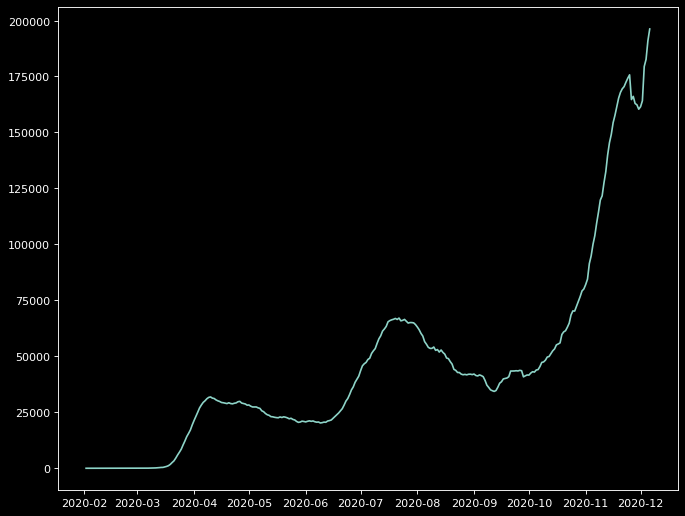

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/8/20


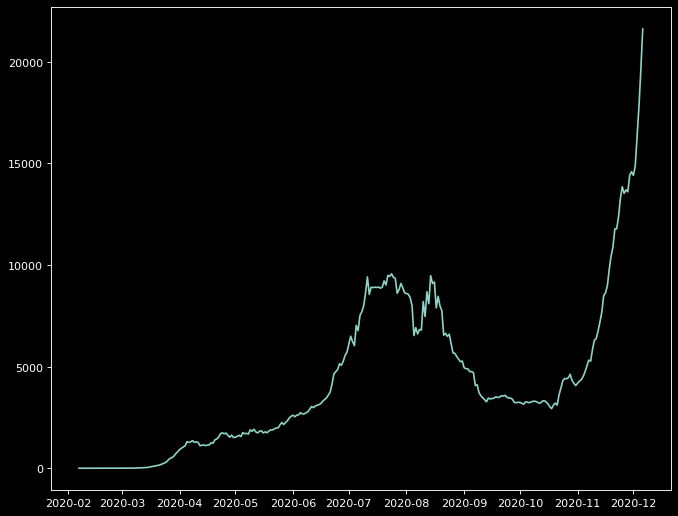

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/8/20


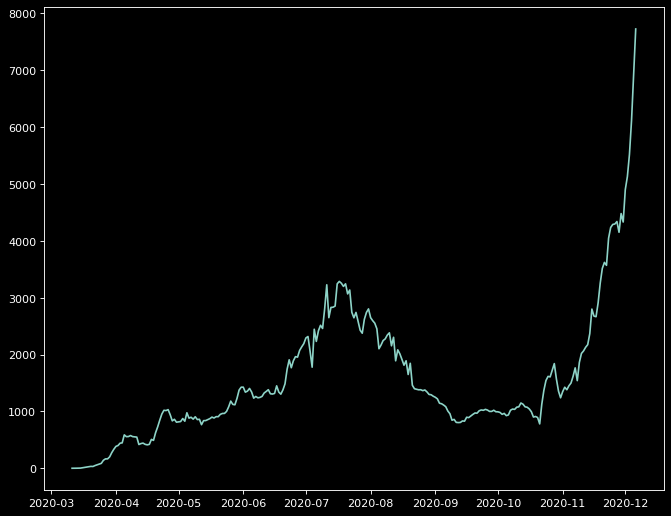

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()